<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Computation of journal bearing

It is possible to use the Reynolds equation to compute de eccentricity and the angle of a journal bearing with fluid film lubrication, given the load $W$

![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/BielPS/1-microFlows/Journal_bearing1.png?raw=1)

Consider that the journal is displaced in the $x$ negative direction, so that $h(\theta) = h_0(1+\varepsilon \cos(\theta))$ where $\varepsilon=\frac{e}{h_0}$ is the relative eccentricity and $h_0 = \frac{1}{2}(D_b -D_a)$ is the average gap thickness. The journal is rotating in the positive direction of $\theta$ (polar coordinates)

![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/BielPS/1-microFlows/Journal_bearing2.png?raw=1)

1. Calculate the pressure distribution $p(\theta)$ and the value and direction of $\mathbf{W}$, in the approximation $\varepsilon \ll 1$.
2. What happens to the journal if $\mathbf{W}$ increase a little bit?
3. Apply the results to this real [example](https://www.mcmaster.com/6658K738/), and discuss the value of the maximum load given by the manufactures at this rotational velocity.
![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/BielPS/1-microFlows/McMaster-Carr_JB.png?raw=1)

# **Assignment 1 solution**
by Group 1: Tobia Pedrotti, Jinuk Lim, Biel Pujadas and Savely Surnachev

First of all, as usual, libraries are imported. For this specific problem, it has been used the symbolic mathematics library known as *sympy*. It will be used for algebraic operations and its implemented solvers.

The "*sp.init_printing()*" command is for the correct visualization of mathematic expressions.

In [3]:
import sympy as sp
sp.init_printing()

With the libraries imported, variables can now be defined, as well as functions.

In [4]:
x,y,t,mu = sp.symbols('x,y,t,mu')
Ub,Ut = sp.symbols('U_b,U_t') #Initial conditions "bottom" and "top"
u = sp.Function('u')
p = sp.Function('p')
h = sp.Function('h')
p_x = sp.Function('p_x') # This function is the gradient of pressure in x direction

---
Once the variables and functions are defined, the main algebraic expression can be crafted


In [5]:
exp = -p_x(x)/mu+sp.diff(u(y),y,2)
sp.Eq(exp,0)

 2                   
d           pₓ(x)    
───(u(y)) - ───── = 0
  2           μ      
dy                   

To solve this differential equation, two boundary conditions are defined: the speed of the fluid at the bottom and the top of the analysis.

As the boundary conditions are set, the command *.dsolve* can solve the First-order differential equation, and command *.simplify* is used to simplify the return.

In [6]:
ics = {u(0):Ub,u(h(x)):Ut}
Sol = sp.dsolve(exp,u(y),ics=ics)
Sol = Sol.simplify()

To obtain the volumetric flow rate, the velocity profile is integrated across the film thickness \( h(x) \).


In [7]:
U = sp.symbols('U')
Sol = Sol.replace(Ut,U).replace(Ub,0)
intU = sp.integrate(Sol.rhs,(y,0,h(x)))


To describe the lubrication flow, we derive the Reynolds equation by applying the continuity equation.

In [8]:
ReynoldsEq = sp.Eq(intU.diff(x),0)
ReynoldsEq = ReynoldsEq.expand()

To calculate the pressure distribution, we set up the governing equation for pressure gradient. Deffining in the proces the flow rate *q*.

In [9]:
q = sp.symbols('q')
exp_dpdx = sp.solve(intU-q,p_x(x))

p_eq = sp.Eq(p_x(x), exp_dpdx[0])
p_eq = p_eq.replace(p_x(x),p(x).diff(x))

To solve for  $p(x)$, we:  
1. Replace $h(x)$ with its perturbed form $h_0 (1 + \epsilon \cos(x))$.
2. Expand the equation using a Taylor series up to third-order terms in $( \epsilon $) and simplify.
3. Solve the resulting differential equation using symbolic computation .dsolve applying boundary conditions.  
4. Simplify the final expression.  

In [10]:
h0,epsi,r = sp.symbols('h_0, epsilon,r')
p_eq = p_eq.replace(h(x),h0*(1+epsi*sp.cos(x))) #theta for x
display(p_eq)

p_sol = sp.Eq(p_eq.lhs,p_eq.rhs.series(epsi,0,n=4).removeO())
p_sol = p_sol.simplify()
display(p_sol)

pref = sp.symbols('p_ref')
p_sol = sp.dsolve(p_sol,p(x),ics={p(0):pref})
p_sol = p_sol.simplify()
display(p_sol)

d          6⋅μ⋅(U⋅h₀⋅(ε⋅cos(x) + 1) - 2⋅q)
──(p(x)) = ───────────────────────────────
dx                 3               3      
                 h₀ ⋅(ε⋅cos(x) + 1)       

               ⎛         ⎛             2                  2                                   ⎞    ↪
d          6⋅μ⋅⎝U⋅h₀ + ε⋅⎝-2⋅U⋅h₀ + 4⋅ε ⋅(-U⋅h₀ + 5⋅q)⋅cos (x) + 3⋅ε⋅(U⋅h₀ - 4⋅q)⋅cos(x) + 6⋅q⎠⋅co ↪
──(p(x)) = ─────────────────────────────────────────────────────────────────────────────────────── ↪
dx                                                          3                                      ↪
                                                          h₀                                       ↪

↪           ⎞
↪ s(x) - 2⋅q⎠
↪ ───────────
↪            
↪            

         3           ⎛       3       3            3                  2             2               ↪
       h₀ ⋅p_ref - μ⋅⎝- 8⋅U⋅ε ⋅h₀⋅sin (x) + 24⋅U⋅ε ⋅h₀⋅sin(x) - 9⋅U⋅ε ⋅h₀⋅x - 9⋅U⋅ε ⋅h₀⋅sin(x)⋅cos ↪
p(x) = ─────────────────────────────────────────────────────────────────────────────────────────── ↪
                                                                                                   ↪
                                                                                                   ↪

↪                                         3      3           3                2           2        ↪
↪ (x) + 12⋅U⋅ε⋅h₀⋅sin(x) - 6⋅U⋅h₀⋅x + 40⋅ε ⋅q⋅sin (x) - 120⋅ε ⋅q⋅sin(x) + 36⋅ε ⋅q⋅x + 36⋅ε ⋅q⋅sin( ↪
↪ ──────────────────────────────────────────────────────────────────────────────────────────────── ↪
↪                     3                                                                            ↪
↪                   h₀                                                                    

Now, we can solve volumetric flow rate \( q \) and apply boundary conditions

In [11]:
q_sol = sp.solve(p_sol.replace(x,2*sp.pi).replace(p(2*sp.pi),pref),q)[0]
display(q_sol)

     ⎛   2    ⎞
U⋅h₀⋅⎝3⋅ε  + 2⎠
───────────────
   ⎛   2    ⎞  
 4⋅⎝3⋅ε  + 1⎠  

We now replace $q$ with its definition, and we solve it

In [12]:
p_sol = p_sol.replace(q,q_sol)
display(p_sol)

                     ⎛                                                3    ⎛   2    ⎞    3         ↪
         3           ⎜       3       3            3             10⋅U⋅ε ⋅h₀⋅⎝3⋅ε  + 2⎠⋅sin (x)   30 ↪
       h₀ ⋅p_ref - μ⋅⎜- 8⋅U⋅ε ⋅h₀⋅sin (x) + 24⋅U⋅ε ⋅h₀⋅sin(x) + ───────────────────────────── - ── ↪
                     ⎜                                                       2                     ↪
                     ⎝                                                    3⋅ε  + 1                 ↪
p(x) = ─────────────────────────────────────────────────────────────────────────────────────────── ↪
                                                                                                   ↪
                                                                                                   ↪

↪     3    ⎛   2    ⎞                             2      ⎛   2    ⎞                                ↪
↪ ⋅U⋅ε ⋅h₀⋅⎝3⋅ε  + 2⎠⋅sin(x)        2        9⋅U⋅ε ⋅h₀⋅x⋅⎝3⋅ε  + 2⎠        2              

The pressure solution $( p_{\text{sol}} $) is modified by subtracting the reference pressure $( p_{\text{ref}} $\) from both sides and multiplying the right-hand side by $( \cos(x) $). This adjustment accounts for the pressure variation along the angular direction $( x ) $.

Next, the load $( W $) is calculated by integrating the modified pressure distribution over one full cycle $from $ x = 0 $ to $ x = 2π . .



In [13]:
p_sol = sp.Eq(p_sol.lhs-pref,(p_sol.rhs-pref)*sp.sin(x))


W = p_sol.rhs.integrate((x,0,2*sp.pi))
display(W)

           5                   3                         
   54⋅π⋅U⋅ε ⋅μ         72⋅π⋅U⋅ε ⋅μ         24⋅π⋅U⋅ε⋅μ    
───────────────── + ───────────────── + ─────────────────
    2   2       2       2   2       2       2   2       2
12⋅ε ⋅h₀  + 4⋅h₀    12⋅ε ⋅h₀  + 4⋅h₀    12⋅ε ⋅h₀  + 4⋅h₀ 

 **Applying the Results to a Real Example and Discussing the Maximum Load at Given Rotational Velocity**


The required libraries for creating plots and visualizing data:


In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Several physical parameters related to the journal bearing system are defined: r, $ω$, U, h

In [15]:
r = 0.005005
omega = 120*2*sp.pi/60
U1 = r * omega
h01 = 0.005e-3
#Weight = sp.lambdify(epsi,W)

values = {pref:1,U:U1,h0:h01,mu:46.43} #mu: viscosity at 50 degrees celcius

Now, we can plot it and evaluate how the load changes and assess the performance of the journal bearing in this setup.

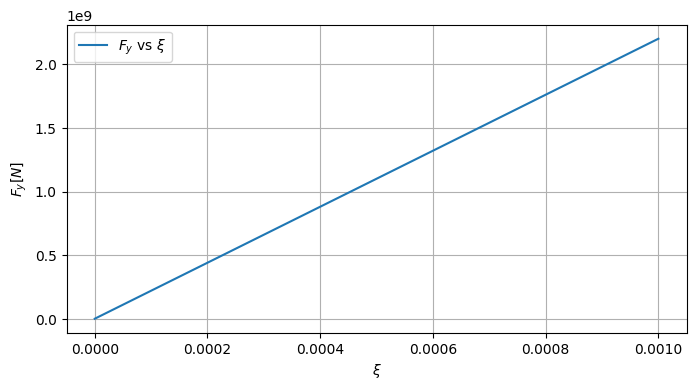

In [18]:
fig,ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,0.001,250)
x1_t = sp.lambdify(epsi,W.subs(values))
ax.plot(tt,x1_t(tt).real, label=r'$F_y$ vs $\xi$')
ax.legend()
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$F_y [N]$')
ax.grid(which='major',axis='both')